# Heart Disease Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import os
print(os.getcwd())

C:\Users\Shayan\OneDrive\Desktop\Multiple_Disease_Prediction-main\notebooks


In [3]:
#import dataset
heart_df = pd.read_csv(r'C:\Users\Shayan\OneDrive\Desktop\Multiple_Disease_Prediction-main\dataset\heart.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.shape

(303, 14)

# Checking null values

In [7]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_df.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [9]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Data Analysis(EDA)

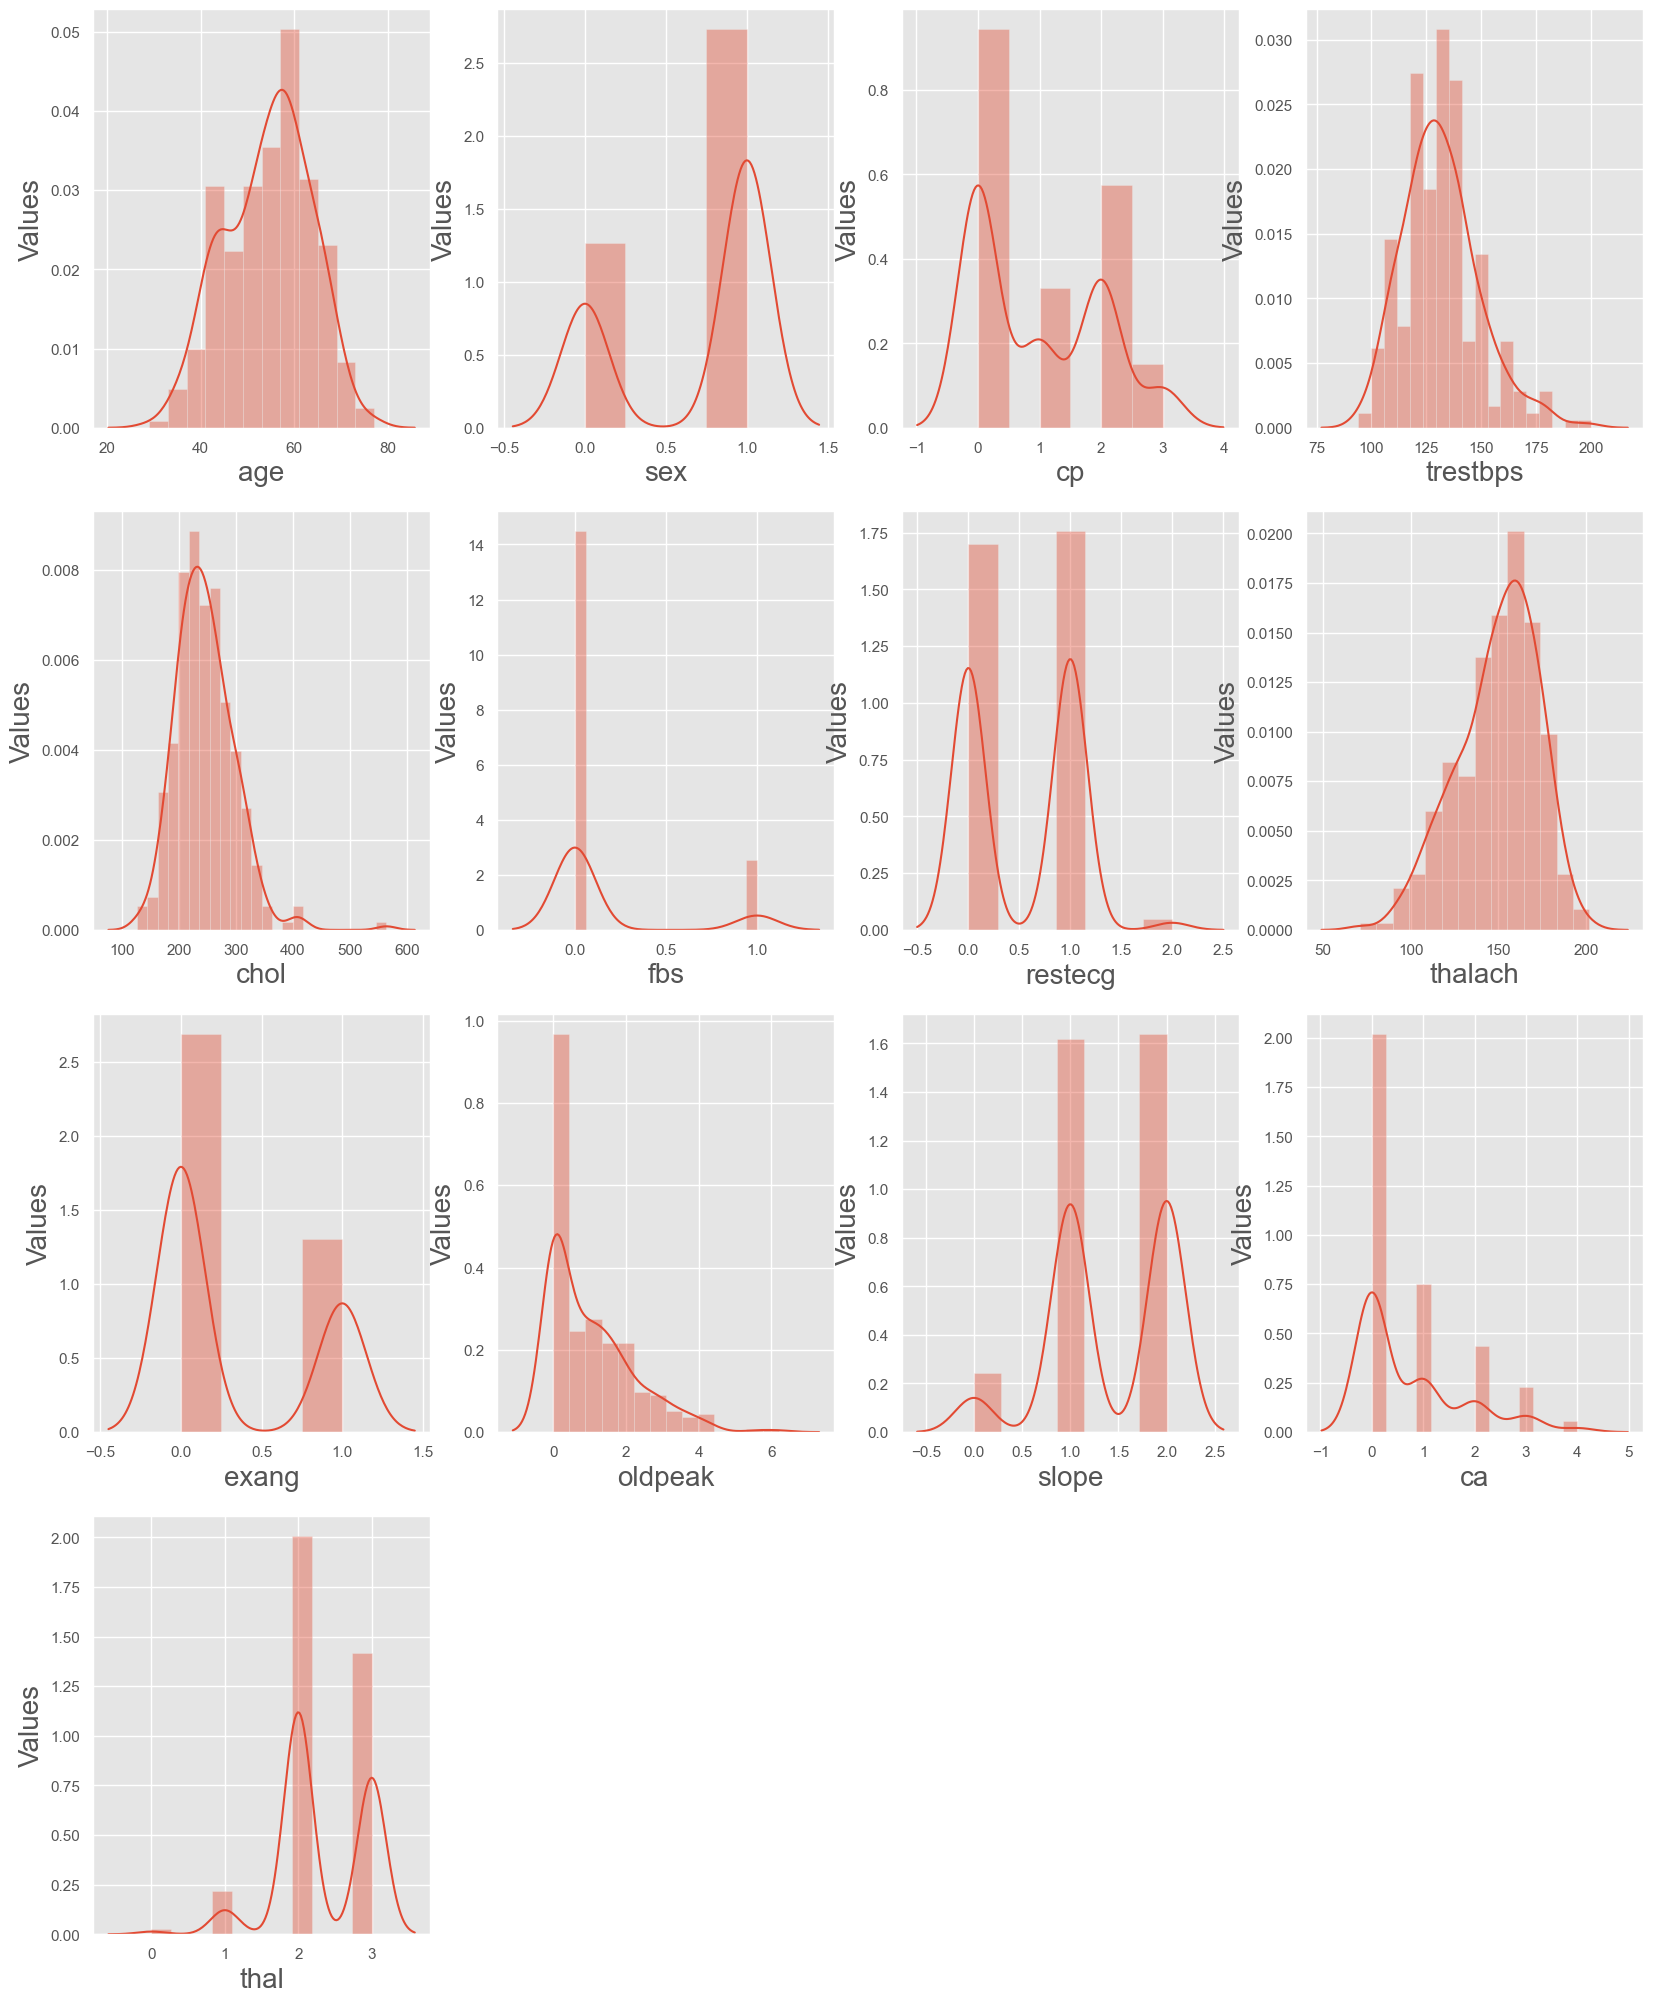

In [10]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

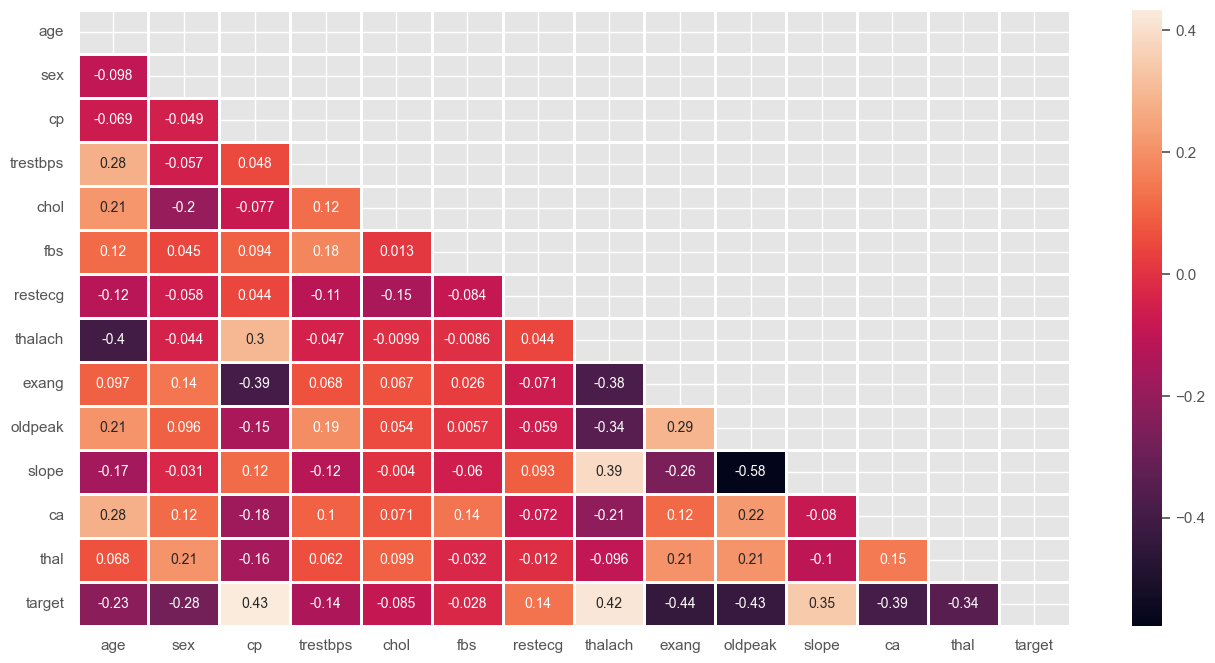

In [11]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [12]:
#checking the variance
heart_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization

In [13]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [14]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [16]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.9 KB


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Dictionary to store model names and initialized models
models = {
    'Logistic Regression': LogisticRegression(penalty='l2'),
    'KNN': KNeighborsClassifier(n_neighbors=8),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(criterion='gini', max_depth=7, max_features='sqrt',
                                             min_samples_leaf=2, min_samples_split=4, n_estimators=180),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, loss='log_loss', n_estimators=180),
    'XGBoost': XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=5, n_estimators=180,
                             eval_metric='logloss')
}

# Dictionary to store accuracies
accuracies = {}

# GridSearch for Decision Tree
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'splitter': ['best', 'random']
}
dtc = models['Decision Tree']
grid_search = GridSearchCV(dtc, grid_params, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
models['Decision Tree'] = grid_search.best_estimator_

# Loop through each model
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    accuracies[name] = test_acc

    print(f"Training Accuracy: {train_acc:.2f}%")
    print(f"Testing Accuracy: {test_acc:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

# Final comparison
import pandas as pd
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy (%)"])
accuracy_df = accuracy_df.sort_values(by="Accuracy (%)", ascending=False)

print("\n===== Model Accuracy Comparison =====")
print(accuracy_df)


Fitting 10 folds for each of 8640 candidates, totalling 86400 fits

===== Logistic Regression =====
Training Accuracy: 85.38%
Testing Accuracy: 80.22%
Confusion Matrix:
[[32 12]
 [ 6 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91


===== KNN =====
Training Accuracy: 85.85%
Testing Accuracy: 75.82%
Confusion Matrix:
[[29 15]
 [ 7 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        44
           1       0.73      0.85      0.78        47

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.75        91
weighted avg       0.77      0.76      0.76        91


===== 

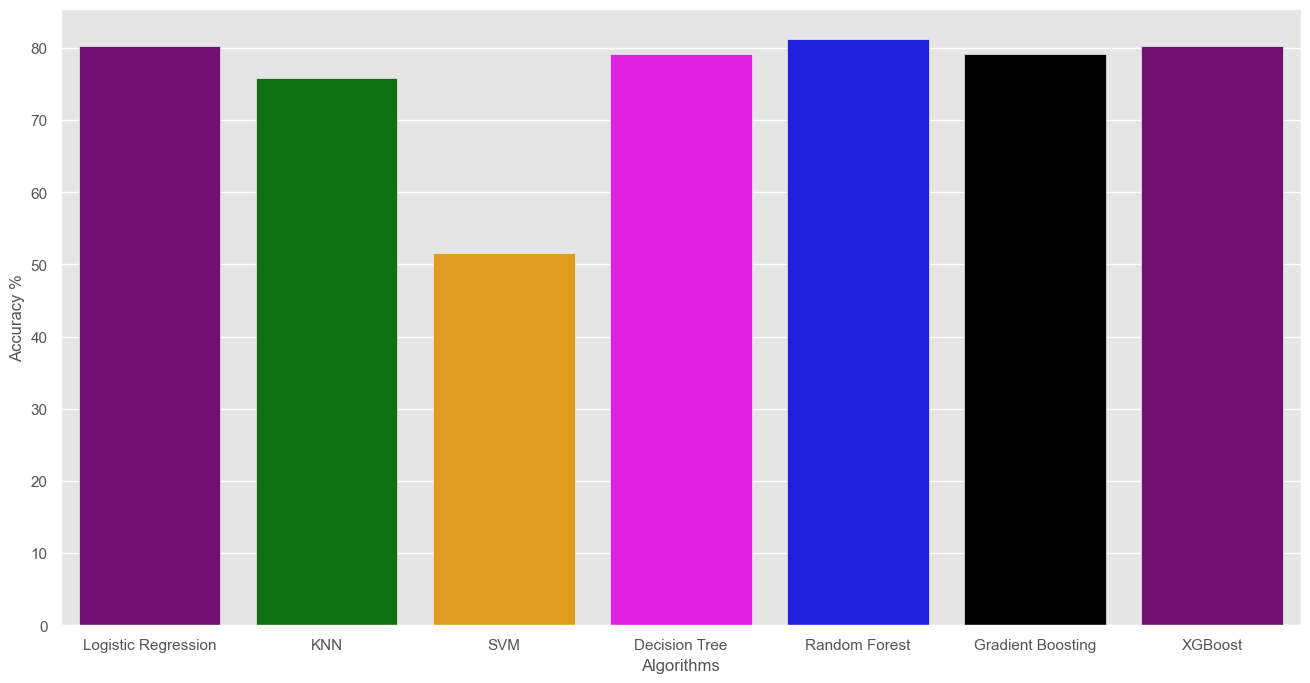

In [20]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [22]:
models = pd.DataFrame({
    'Model': list(accuracies.keys()),
    'Score': list(accuracies.values())
})

models = models.sort_values(by='Score', ascending=False)
print(models)


                 Model      Score
4        Random Forest  81.318681
6              XGBoost  80.219780
0  Logistic Regression  80.219780
3        Decision Tree  79.120879
5    Gradient Boosting  79.120879
1                  KNN  75.824176
2                  SVM  51.648352


In [19]:
import pickle

# Get the trained Random Forest model from the models dictionary
model = models['Random Forest']

# Save the model using pickle
pickle.dump(model, open("heart_prct.pkl", 'wb'))


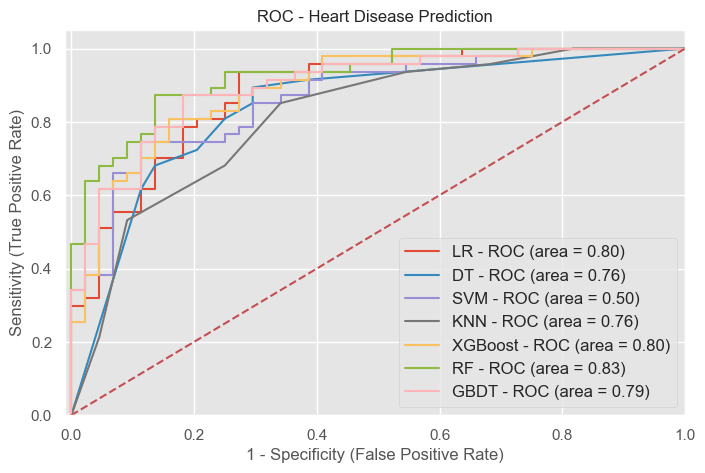

In [21]:
models_list = [
    {'label': 'LR', 'model': models['Logistic Regression']},
    {'label': 'DT', 'model': models['Decision Tree']},
    {'label': 'SVM', 'model': models['SVM']},
    {'label': 'KNN', 'model': models['KNN']},
    {'label': 'XGBoost', 'model': models['XGBoost']},
    {'label': 'RF', 'model': models['Random Forest']},
    {'label': 'GBDT', 'model': models['Gradient Boosting']}
]

plt.figure(figsize=(8,5))

for m in models_list:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


Accuracy List: [80.22, 72.53, 51.65, 75.82, 80.22, 82.42, 79.12]
ROC AUC List: [np.float64(79.97999999999999), np.float64(72.32), np.float64(50.0), np.float64(75.51), np.float64(79.97999999999999), np.float64(82.11), np.float64(78.84)]


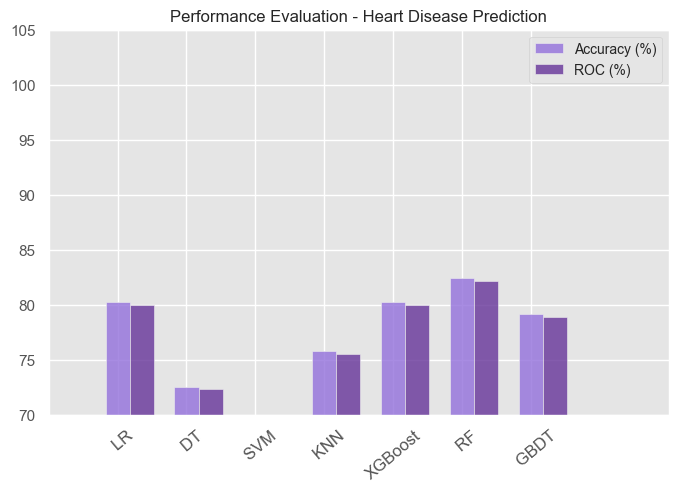

In [22]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Assign models properly
lr = models['Logistic Regression']
dtc2 = models['Decision Tree']
svc = models['SVM']
knn = models['KNN']
xgb = models['XGBoost']
rfc = models['Random Forest']
gbc = models['Gradient Boosting']

models_list = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc2},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rfc},
    {'label': 'GBDT', 'model': gbc}
]

means_roc = []
means_accuracy = []

for m in models_list:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test) 
    
    # Accuracy calculation
    acc = metrics.accuracy_score(y_test, y_pred)
    means_accuracy.append(100 * round(acc, 4))
    
    # ROC AUC calculation
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    means_roc.append(100 * round(auc, 4))

print("Accuracy List:", means_accuracy)
print("ROC AUC List:", means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 105])

plt.title('Performance Evaluation - Heart Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost', '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
